# Palmer penguins

In [1]:
import pandas as pd
import altair as alt
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
penguins = pd.read_csv("https://pos.it/palmer-penguins-github-csv")

In [3]:
#| label: tbl-penguin-species
#| caption: Penguin species
penguins.groupby("species").size().reset_index(name = "count")

,species,count
0,Adelie,152
1,Chinstrap,68
2,Gentoo,124


In [4]:
colors = ["#FF8C00", "#A020F0", "#008B8B"]
sns.set_palette(colors, n_colors = 3)

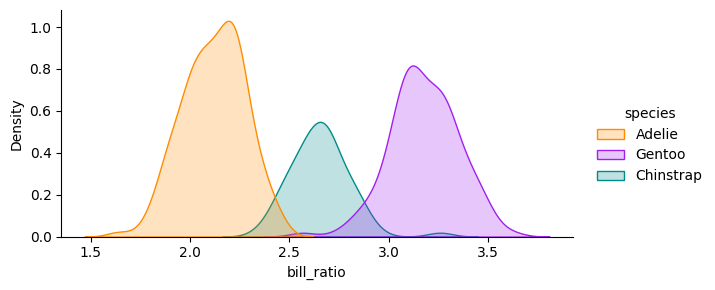

In [5]:
penguins["bill_ratio"] = (
   penguins["bill_length_mm"] / penguins["bill_depth_mm"] 
)
sns.displot(penguins, 
            x = "bill_ratio", 
            hue = "species", 
            kind = "kde", fill = True, aspect = 2, height = 3)
plt.show()

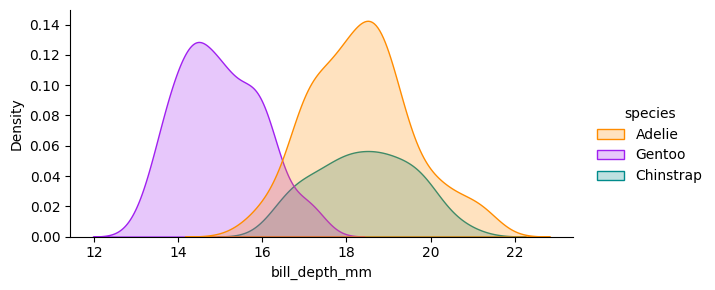

In [6]:
sns.displot(penguins, 
            x = "bill_depth_mm", 
            hue = "species", 
            kind = "kde", fill = True, 
            aspect = 2, height = 3)
plt.show()

In [7]:
scale = alt.Scale(domain = ['Adelie', 'Chinstrap', 'Gentoo'],
                  range = colors)

In [8]:
#| label: fig-bill-penguins
#| fig-cap: "A scatter plot of bill dimensions for penguins, made with Altair."

alt.Chart(penguins).mark_circle(size=60).encode(
    alt.X('bill_length_mm',
        scale=alt.Scale(zero=False)
    ),
    alt.Y('bill_depth_mm',
        scale=alt.Scale(zero=False)
    ),
    color = alt.Color('species', scale = scale),
    tooltip=['species', 'sex', 'island']
)

alt.Chart(...)